In [8]:
pip install causal-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('C:/Users/ACER/Documents/causal/csuite_mixed_confounding/train.csv')
df_test = pd.read_csv('C:/Users/ACER/Documents/causal/csuite_mixed_confounding/test.csv')

In [2]:
from sklearn.model_selection import train_test_split
from causallearn.search.ConstraintBased.FCI import fci

data_array_train = df_train.values
data_array_test = df_test.values


fci_train,edges_train = fci(data_array_train)
fci_test,edges_test = fci(data_array_test)

  0%|          | 0/12 [00:00<?, ?it/s]

X1 --> X10


  0%|          | 0/12 [00:00<?, ?it/s]

X1 --> X10
X12 --> X1
X2 --> X12


In [3]:
true_adj = fci_train
inferred_adj = fci_test

In [4]:
def calculate_mcc(arrowsTp, arrowsTn, arrowsFp, arrowsFn):
    """Menghitung Matthews Correlation Coefficient (MCC)."""
    numerator = (arrowsTp * arrowsTn) - (arrowsFp * arrowsFn)
    denominator = ((arrowsTp + arrowsFp) * (arrowsTp + arrowsFn) * 
                   (arrowsTn + arrowsFp) * (arrowsTn + arrowsFn)) ** 0.5
    if denominator == 0:
        return 0  # Jika denominator nol, kembalikan 0
    return numerator / denominator

def calculate_fdr(arrowsTp, arrowsFp):
    """Menghitung False Discovery Rate (FDR)."""
    if (arrowsTp + arrowsFp) == 0:
        return 0  # Menghindari pembagian dengan nol
    return arrowsFp / (arrowsTp + arrowsFp)

def calculate_sid(arrowsTp, arrowsTn, arrowsFp, arrowsFn):
    """Menghitung Structural Independence Distance (SID)."""
    return arrowsFp + arrowsFn  # Menghitung SID


In [9]:
from causallearn.graph.ArrowConfusion import ArrowConfusion
from causallearn.graph.AdjacencyConfusion import AdjacencyConfusion
from causallearn.graph.SHD import SHD

# For arrows
arrow = ArrowConfusion(true_adj, inferred_adj)

arrowsTp = arrow.get_arrows_tp()
arrowsFp = arrow.get_arrows_fp()
arrowsFn = arrow.get_arrows_fn()
arrowsTn = arrow.get_arrows_tn()

arrowPrec = arrow.get_arrows_precision()
arrowRec = arrow.get_arrows_recall()
# For adjacency matrices
adj = AdjacencyConfusion(true_adj, inferred_adj)

adjTp = adj.get_adj_tp()
adjFp = adj.get_adj_fp()
adjFn = adj.get_adj_fn()
adjTn = adj.get_adj_tn()
adjPrec = adj.get_adj_precision()
adjRec = adj.get_adj_recall()

shd = SHD(true_adj, inferred_adj).get_shd()
mcc = calculate_mcc(arrowsTp, arrowsTn, arrowsFp, arrowsFn)
fdr = calculate_fdr(arrowsTp, arrowsFp)
sid = calculate_sid(arrowsTp, arrowsTn, arrowsFp, arrowsFn)


#print(f"Arrows True Positive: {arrowsTp}, False Positive: {arrowsFp}, False Negative: {arrowsFn}, True Negative: {arrowsTn}")
#print(f"Arrow Precision: {arrowPrec}, Recall: {arrowRec}")
#print(f"Adjacency True Positive: {adjTp}, False Positive: {adjFp}, False Negative: {adjFn}, True Negative: {adjTn}")
#print(f"Adjacency Precision: {adjPrec}, Recall: {adjRec}")
print(f"SHD: {shd}")
print(f"SID: {sid}")
print(f"FDR: {fdr}")
print(f"MCC: {mcc}")



SHD: 8
SID: 8.0
FDR: 0.29411764705882354
MCC: 0.7206691658885025


In [7]:
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(inferred_adj)
pdy.write_png('simple_test_4.png')

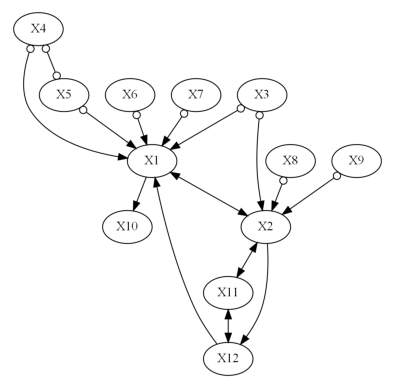

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'simple_test_3.png'  
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()